# SC2001/CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS

## Project 1: Integration of Mergesort & Insertion Sort

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer $S$ as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to $S$, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

(a) **Algorithm implementation**: Implement the above hybrid algorithm.

In [19]:
def insertionSort(n, m):
  for i in range(n+1, m):
    for j in range(i, n, -1):
      if L[j] < L[j-1]: L[j], L[j-1] = L[j-1], L[j]
      else: break

In [20]:
def merge(n, m):
  if m-n <= 0: return L
  mid = n + (m-n)//2
  a, b = n, mid+1
  # up to this is true
  while a <= mid and b <= m:
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]: # TO DO: write one-liner code
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1

def mergeSort(n, m):
  mid = n + (m-n)//2
  if m-n <= 0: return
  else: # m-n >= 1
    mergeSort(n, mid)
    mergeSort(mid+1, m)
  merge(n, m)

In [21]:
def switchSort(n, m): # TO DO: find the threshold S
  S=100 #fix S=100 first
  if m-n > S: mergeSort(n, m)
  else: insertionSort(n, m)

In [22]:
import time
import random

L = random.sample(range(-10**10, 10**10), 10**4)

st = time.process_time()
switchSort(0, 10**4-1)
et = time.process_time()

#print(L, et-st)

(b) **Generate input data**: Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of $[1, …, x]$, where $x$ is the largest number you allow for your
datasets.

In [23]:
import random

def generate(N):
  L_arr = random.sample(range(1,10**10), N)
  return L_arr

(c) Analyze time complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

i. With the value of $S$ fixed, plot the number of key comparisons over different sizes of the input list $n$. Compare your empirical results with your theoretical analysis of the time complexity.

ii. With the input size $n$ fixed, plot the number of key comparisons over different values of $S$. Compare your empirical results with your theoretical analysis of the time complexity.

iii. Using different sizes of input datasets, study how to determine an optimal value of $S$ for the best performance of this hybrid algorithm.


We redefine the function `merge` and `mergeSort` to add counter `key_comparison`.

In [24]:
def merge(n, m):
  key_comparison = 0
  if m-n <= 0: return 0
  mid = n + (m-n)//2
  a, b = n, mid+1
  while a <= mid and b <= m:
    if L[a] < L[b]:
      a += 1
    elif L[a] > L[b]: # TO DO: write one-liner code
      temp = L[b]
      for i in range(b, a, -1):
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    else: # L[a] == L[b]
      if a == mid and b == m: break
      a += 1
      temp = L[b]
      for i in range(b, a, -1): 
        L[i] = L[i-1]
      L[a] = temp
      a += 1
      b += 1
      mid += 1
    key_comparison += 1
  return key_comparison

def mergeSort(n, m):
  mid = n + (m-n)//2
  if m-n <= 0: return 0
  else: # m-n >= 1
    key_comparison_l = mergeSort(n, mid)
    key_comparison_r = mergeSort(mid+1, m)
  key_comparison_merge = merge(n, m)
  keyC = key_comparison_l + key_comparison_r + key_comparison_merge
  return keyC

def insertionSort(n, m):
  key_comparison_is=0
  for i in range(n+1, m):
    for j in range(i, n, -1):
      if L[j] < L[j-1]:
        L[j], L[j-1] = L[j-1], L[j]
        key_comparison_is+=1
      else: break
  return key_comparison_is

def switchSort(n, m, S):
  keycomp_total=0
  if m-n > S: keycomp_total += mergeSort(n, m)
  else: keycomp_total += insertionSort(n, m)
  return keycomp_total

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

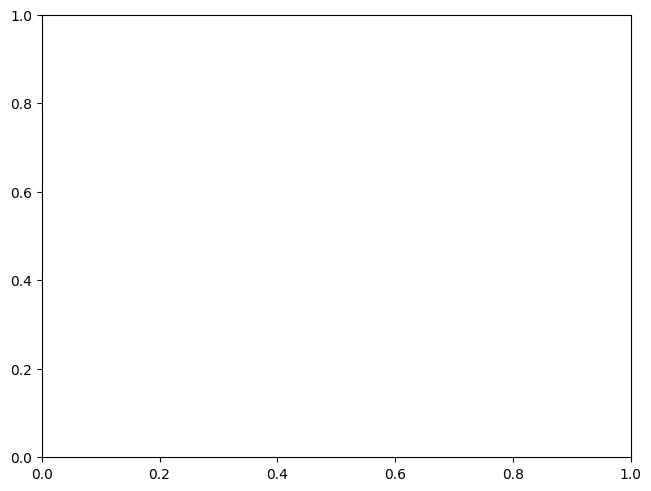

In [31]:
#======================
# (i) fix integer S=100
#======================
import matplotlib.pyplot as plt
import numpy as np

kc=[]
N_arr=[]

#def main():
iterations=1000
while (iterations>0): #iterate & collect data for key comparisons when varying n
  keycomp_total=0
  N = random.randint(10,10**2)
  L = generate(N)
  keycomp_total = switchSort(0,N-1,100)
  kc.append(keycomp_total)
  N_arr.append(N)
  iterations-=1

#if __name__=="__main__":
#  main()

"""
fig, (ax1) = plt.subplots(1, 1, constrained_layout=False, figsize=(15,10))
ax1.plot(N_arr[:],kc[:])
ax1.set_title("(c)(i)")
ax1.set_ylabel('no. of key comparisons')
ax1.set_xlabel('Array size, n')
plt.show()
"""
fig = plt.figure(constrained_layout=True)
ax1 = fig.subplots(1,1, squeeze=False)
ax1.hist(kc[:])




(d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of $S$ obtained in (c) for this task.

Now we have the optimal value of $S$ based on our work in (c). We want to redefine the function 'switchSort'.

In [ ]:
S = 0 # TO DO: find the threshold value S

def switchSort(n, m): # TO DO: find the threshold S
  if m-n > S: mergeSort(n, m)
  else: insertionSort(n, m)

In [ ]:
import random
import time

L = random.sample(range(-10**10, 10**10), 10**7)

st = time.process_time()
mergeSort(0, 10**7-1)
et = time.process_time()

print(et-st)

In [ ]:
L = [2, 3, 4, 1, 6, 7, 5, 8]

print(mergeSort(0, 7), L)